# Machine Learning "Hello World!"
A quick introduction to Machine Learning for anyone who wants to see a basic example.

The goal will be to classify records based on two observed features. This will be a Supervised Learning task, which means that we will use a set of records with known labels to train a model and then we will apply the model to predict labels on records where we don't know them.
## Load Our Beloved Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Load Labelled Data

In [2]:
df_labl = pd.read_csv('Data_Labelled.csv', index_col=0)
df_labl

Feature A  Feature B  Class
Record ID                             
1                  1          3      1
2                  2          1      0
3                  3          1      0
4                  3          2      1
5                  3          3      1
6                  5          1      0
7                  6          1      0
8                  6          3      1
9                  7          1      0
10                 8          3      1
11                 9          2      0
12                11          1      0

## Load Unlabelled Data

In [3]:
df_nolabl = pd.read_csv('Data_Unlabelled.csv', index_col=0)
df_nolabl

Feature A  Feature B
Record ID                      
51                 2          3
52                 4          1
53                 5          2
54                 7          3
55                10          2
56                10          1

## Visualize the Labelled Data

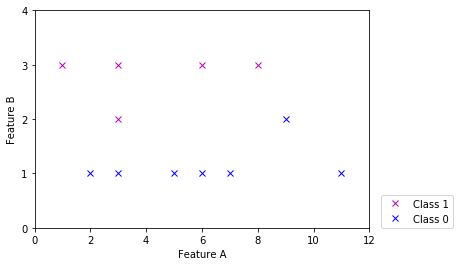

In [4]:
figure, axes = plt.subplots()

# Plot labelled records
class0_x = df_labl.loc[df_labl.Class == 0, 'Feature A']
class0_y = df_labl.loc[df_labl.Class == 0, 'Feature B']
class1_x = df_labl.loc[df_labl.Class == 1, 'Feature A']
class1_y = df_labl.loc[df_labl.Class == 1, 'Feature B']
class0_points, = axes.plot(class0_x, class0_y, 'bx')
class1_points, = axes.plot(class1_x, class1_y, 'mx')

# Format axes
axes.set_xlabel('Feature A')
axes.set_ylabel('Feature B')
xmax = 12
ymax = 4
axes.set_xlim(0, xmax)
axes.set_ylim(0, ymax)
axes.set_yticks(range(ymax+1))

# Create a legend
legend_handles = [class1_points, class0_points]
legend_labels = ['Class 1', 'Class 0']
legend_args = {'loc': 4, 'bbox_to_anchor': (1.25, 0), 'borderaxespad': 0}
axes.legend(legend_handles, legend_labels, **legend_args)

plt.show()

## Visualize the Unlabelled Data

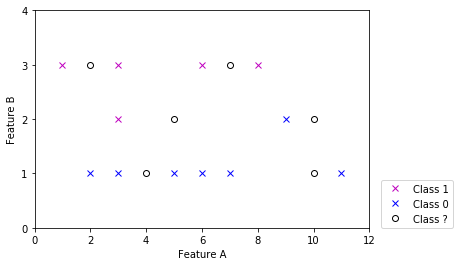

In [5]:
# Plot unlabelled records
nolabl_x = df_nolabl.loc[:, 'Feature A']
nolabl_y = df_nolabl.loc[:, 'Feature B']
nolabl_points, = axes.plot(nolabl_x, nolabl_y, 'ko', markerfacecolor='white')

# Update the legend
legend_handles.append(nolabl_points)
legend_labels.append('Class ?')
axes.legend(legend_handles, legend_labels, **legend_args)

figure

## Fit a Model
We will use one of the simplest algorithms in Machine Learning: Linear Regression. Linear Regression with two regressors (features) can be calculated using the following formula.

$
\begin{equation*}
Class = c_A Feature_A + c_B Feature_B + c_0
\end{equation*}
$

Now let's train the model and print its coeficients.

_Note_: For the sake of brevity, splitting the data into a train set and a test set is omitted.

In [6]:
# Train the model
train_features = df_labl.loc[:, ['Feature A', 'Feature B']]
train_labels = df_labl.loc[:, 'Class']
clf = LinearRegression()
clf.fit(train_features, train_labels)

# Show coeficients
ca, cb = clf.coef_
c0 = clf.intercept_
print(f'cA = {ca:6.2f}')
print(f'cB = {cb:6.2f}')
print(f'c0 = {c0:6.2f}')

cA =  -0.03
cB =   0.48
c0 =  -0.31


## Visualize the Boundary
We have two classes: 0 and 1. So let's define the decision boundary as 0.5. Everything below this threshold will be classified as class 0, everything equal to or larger will be classified as 1. To plot the decision boundary we need to extract Feature B from the equation.

$
\begin{align}
0.5 &= c_A Feature_A + c_B Feature_B + c_0 \\
-c_B Feature_B + 0.5 &= c_A Feature_A + c_0 \\
-c_B Feature_B &= c_A Feature_A + c_0 - 0.5 \\[10pt]
Feature_B &= -\frac{c_A Feature_A + c_0 - 0.5}{c_B}
\end{align}
$

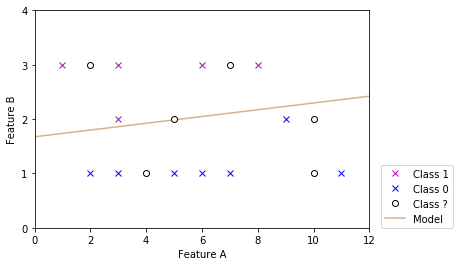

In [7]:
boundary = 0.5

# Plot the boundary
fa = range(xmax+1)
boundary_line, = axes.plot(fa, -(ca*fa + c0 - boundary) / cb, 'tan', zorder=0)

# Update the legend
legend_handles.append(boundary_line)
legend_labels.append('Model')
axes.legend(legend_handles, legend_labels, **legend_args)

figure

## Predict Labels
Finally, let's apply the model to the unlabelled records and predict their class.

In [8]:
df_nolabl['Prediction'] = clf.predict(df_nolabl)
df_nolabl['Predicted class'] = [0 if i<boundary else 1 for i in df_nolabl['Prediction']]
df_nolabl.round(2)

Feature A  Feature B  Prediction  Predicted class
Record ID                                                   
51                 2          3        1.08                1
52                 4          1        0.05                0
53                 5          2        0.51                1
54                 7          3        0.93                1
55                10          2        0.36                0
56                10          1       -0.13                0